In [3]:
!pip install seaborn matplotlib bokeh plotly

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [40]:
movies=pd.read_csv("movies.dat",sep="::", encoding = "ISO-8859-1", header=None)
ratings = pd.read_csv("ratings.dat",sep="::", encoding = "ISO-8859-1", header=None) 
users = pd.read_csv("users.dat",sep="::", encoding = "ISO-8859-1", header=None)

/var/folders/vl/ds4939js6cn74f1bkm98d0fm0000gn/T/ipykernel_1857/999951935.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_csv("movies.dat",sep="::", encoding = "ISO-8859-1", header=None)
/var/folders/vl/ds4939js6cn74f1bkm98d0fm0000gn/T/ipykernel_1857/999951935.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("ratings.dat",sep="::", encoding = "ISO-8859-1", header=None)
/var/folders/vl/ds4939js6cn74f1bkm98d0fm0000gn/T/ipykernel_1857/999951935.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separ

Visualize overall rating by users

In [41]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [18]:
users

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [19]:
ratings

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [37]:
movies

,MovieID,Title,Genres


In [42]:
#movies = movies.rename(columns={'0': 'MovieID', '1': 'Title', '2': 'Genres'})
#movies = pd.DataFrame(columns=['MovieID', 'Title', 'Genres'])
movies.columns = ['MovieID', 'Title', 'Genres']

In [43]:
movies.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [44]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [67]:
ratings.columns=['UserID','MovieID','Rating','Timestamp']
users.columns=['UserID','Gender','Age','Occupation','Zip-code']


In [68]:
users['Age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

In [69]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [70]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [71]:
users.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [72]:
dataset = pd.merge(pd.merge(movies, ratings), users)

In [73]:
users['Age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

Text(0.5, 0, 'Age Distribution')

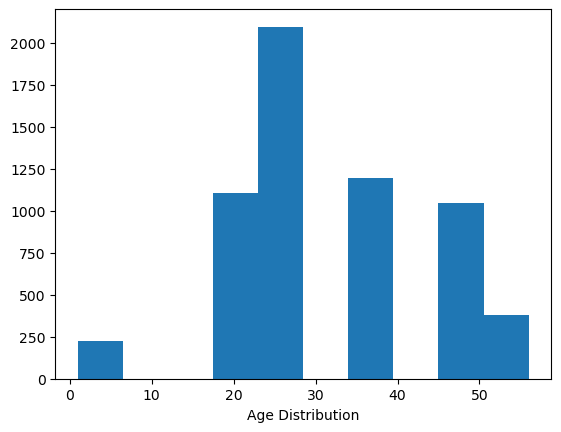

In [74]:
plt.hist(users['Age'])
plt.xlabel('Age Distribution')

In [75]:
AllData = pd.merge(pd.merge(movies,ratings, on= 'MovieID'),users, on = 'UserID')

In [76]:
AllData.groupby('Rating' , axis = 0).UserID.count()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64

<AxesSubplot:xlabel='Rating'>

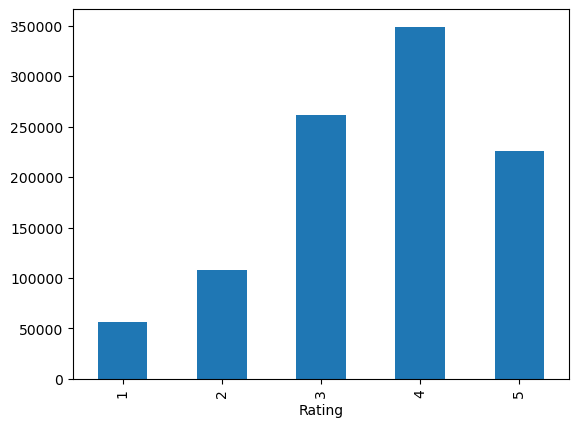

In [77]:
AllData.groupby('Rating' , axis =0).UserID.count().plot(kind='bar')

Find and visualize the user rating of the movie “Toy Story”

In [86]:
toyStory=AllData[(AllData.Title == 'Toy Story (1995)')]

In [87]:
toyStory

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370
...,...,...,...,...,...,...,...,...,...,...
575166,1,Toy Story (1995),Animation|Children's|Comedy,6022,5,956755763,M,25,17,57006
575214,1,Toy Story (1995),Animation|Children's|Comedy,6025,5,956812867,F,25,1,32607
575485,1,Toy Story (1995),Animation|Children's|Comedy,6032,4,956718127,M,45,7,55108
575589,1,Toy Story (1995),Animation|Children's|Comedy,6035,4,956712849,F,25,1,78734


In [90]:
toyStory.shape

(2077, 10)

In [95]:
toyStory[(toyStory.Title == 'Toy Story (1995)')].groupby('Rating' , axis =0).UserID.count()
#toy_story_ratings = AllData[AllData['Title'] == 'Toy Story']['Rating']

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64

<AxesSubplot:xlabel='Rating'>

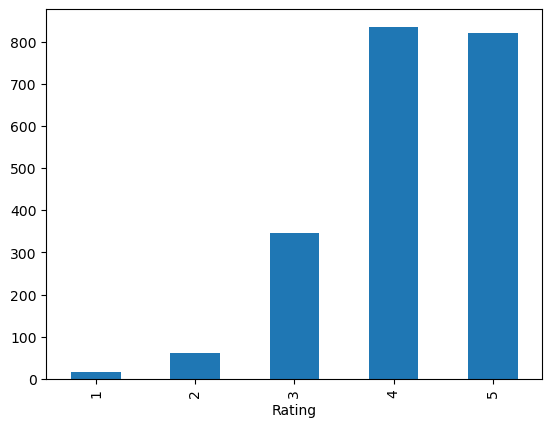

In [96]:
AllData[(AllData.Title == 'Toy Story (1995)')].groupby('Rating' , axis =0).UserID.count().plot(kind='bar')

Find and visualize the viewership of the movie “Toy Story” by age group

In [97]:
AllData[(AllData.Title == 'Toy Story (1995)')].head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


<AxesSubplot:xlabel='Age'>

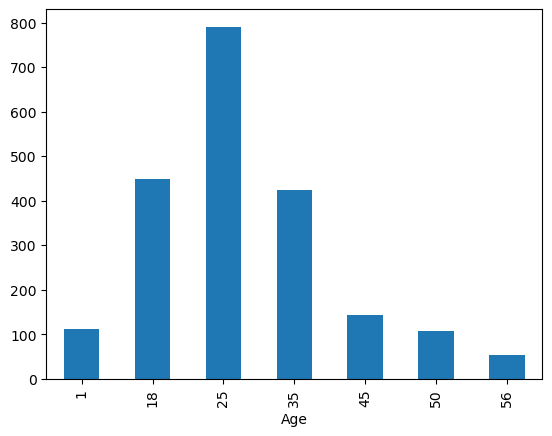

In [98]:
AllData[(AllData.Title == 'Toy Story (1995)')].groupby('Age',axis=0).Rating.count().plot(kind ='bar')

Find and visualize the top 25 movies by viewership rating

In [103]:
AllData.groupby(['MovieID'], axis = 0).Rating.count().nlargest(25)

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64

<AxesSubplot:xlabel='MovieID'>

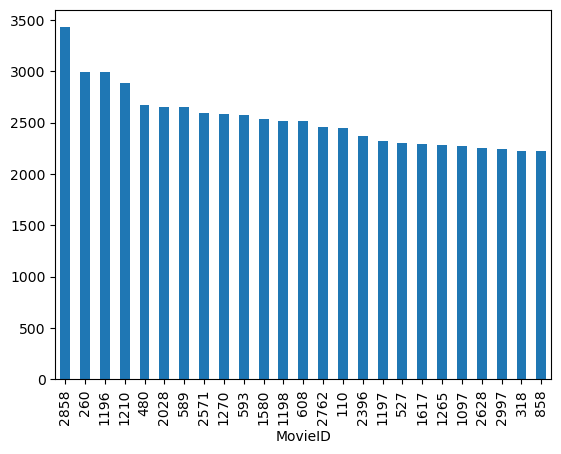

In [104]:
AllData.groupby(['MovieID'], axis = 0).Rating.count().nlargest(25).plot(kind= 'bar')

In [105]:
AllData.groupby(['Genres'], axis = 0).Rating.count().nlargest(25)

Genres
Comedy                          116883
Drama                           111423
Comedy|Romance                   42712
Comedy|Drama                     42245
Drama|Romance                    29170
Action|Thriller                  26759
Horror                           22563
Drama|Thriller                   18248
Thriller                         17851
Action|Adventure|Sci-Fi          17783
Drama|War                        14656
Action|Sci-Fi                    14309
Action|Sci-Fi|Thriller           13970
Action                           12311
Action|Drama|War                 12224
Crime|Drama                      11870
Comedy|Drama|Romance             11069
Action|Adventure                 10446
Action|Drama                     10382
Comedy|Horror                     9681
Comedy|Sci-Fi                     9311
Children's|Comedy                 9077
Animation|Children's              8851
Horror|Thriller                   8649
Animation|Children's|Musical      8220
Name: Rating, dtyp

<AxesSubplot:xlabel='Genres'>

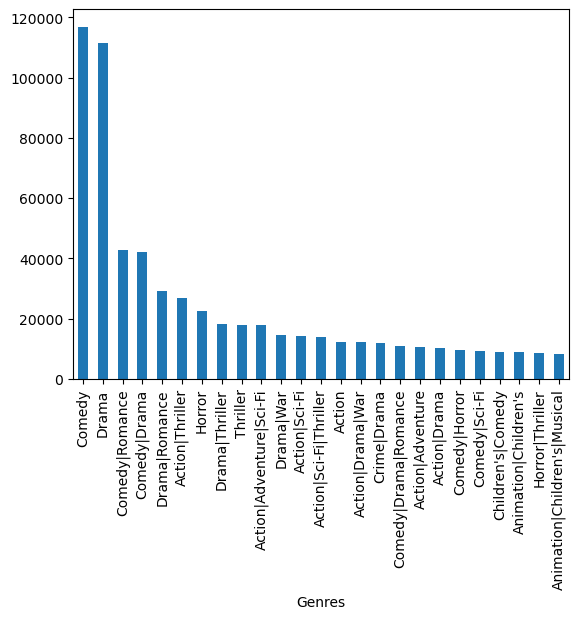

In [106]:
AllData.groupby(['Genres'], axis = 0).Rating.count().nlargest(25).plot(kind= 'bar')

Find the rating for a particular user of user id = 2696

In [107]:
AllData[AllData.UserID == 2696]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


<AxesSubplot:xlabel='Rating'>

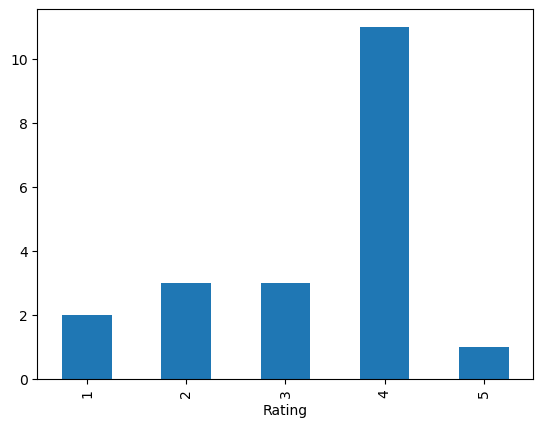

In [108]:
AllData[AllData.UserID == 2696].groupby('Rating').Rating.count().plot(kind='bar')

In [118]:
dataset

,MovieID,Age,Occupation,Rating
0,1,1,10,5
1,48,1,10,5
2,150,1,10,5
3,260,1,10,4
4,527,1,10,5
...,...,...,...,...
495,1197,35,1,5
496,1198,35,1,5
497,1200,35,1,5
498,1201,35,1,2


Perform machine learning on first 500 extracted records

Get first 500 records from all data with
               MovieID,Age,Occupation,Rating

In [109]:
dataset = AllData.iloc[:500,[0,7,8,4]]

In [110]:
dataset.head()

,MovieID,Age,Occupation,Rating
0,1,1,10,5
1,48,1,10,5
2,150,1,10,5
3,260,1,10,4
4,527,1,10,5


In [111]:
features = dataset.iloc[:,[0,1,2]].values

In [112]:
label = dataset.iloc[:,-1].values

In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MovieID     500 non-null    int64
 1   Age         500 non-null    int64
 2   Occupation  500 non-null    int64
 3   Rating      500 non-null    int64
dtypes: int64(4)
memory usage: 19.5 KB


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test=train_test_split(features,label, test_size=0.2, random_state=0)

In [121]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
#Histogram for movie


0.515
0.34


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

(array([111540.,  88165.,  93040., 152426.,  89853., 106948., 107465.,
         96917.,  85914.,  67941.]),
 array([1.0000e+00, 3.9610e+02, 7.9120e+02, 1.1863e+03, 1.5814e+03,
        1.9765e+03, 2.3716e+03, 2.7667e+03, 3.1618e+03, 3.5569e+03,
        3.9520e+03]),
 <BarContainer object of 10 artists>)

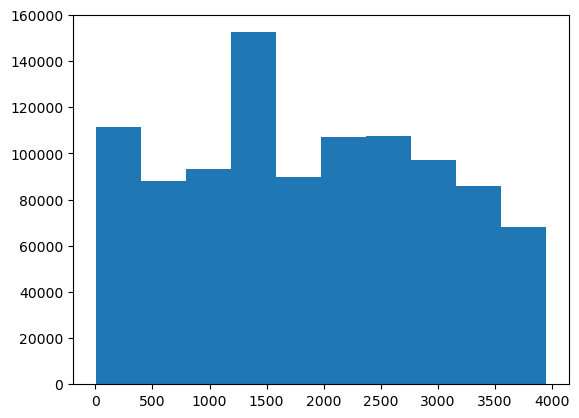

In [122]:
plt.hist(AllData.MovieID)


(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

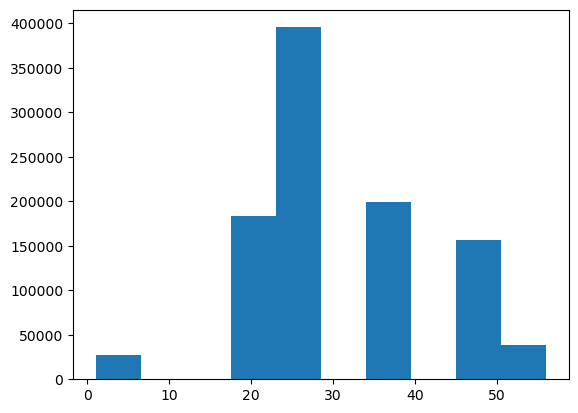

In [123]:
plt.hist(AllData.Age)

(array([215850.,  81691., 152882., 142630.,  14051.,  43853.,  70968.,
         72060., 118837.,  87387.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

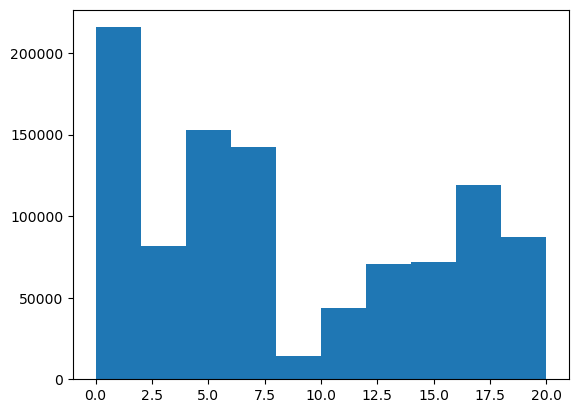

In [124]:
plt.hist(AllData.Occupation)

In [128]:
print(max(AllData.MovieID))
print(max(AllData.Age))
print(max(AllData.Occupation))

3952
56
20


In [130]:
len(AllData)

1000209